In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
import os
os.chdir('C:\\Users\\breje\\OneDrive\\Desktop\\ML Dataset\\Deep Learning - Jose Portilla\\TF_2_Notebooks_and_Data\\05-RNNs')

In [3]:
data = pd.read_csv('google.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/19/2004,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,8/20/2004,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,8/23/2004,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,8/24/2004,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,8/25/2004,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [5]:
data.shape

(3809, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 7 columns):
Date         3809 non-null object
Open         3809 non-null float64
High         3809 non-null float64
Low          3809 non-null float64
Close        3809 non-null float64
Adj Close    3809 non-null float64
Volume       3809 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 208.4+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 7 columns):
Date         3809 non-null datetime64[ns]
Open         3809 non-null float64
High         3809 non-null float64
Low          3809 non-null float64
Close        3809 non-null float64
Adj Close    3809 non-null float64
Volume       3809 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 208.4 KB


In [9]:
train_data = data[data['Date']<'01-01-2019']

In [10]:
train_data.shape

(3617, 7)

In [11]:
train_data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3607,2018-12-17,1037.510010,1053.150024,1007.900024,1016.530029,1016.530029,2385400
3608,2018-12-18,1026.089966,1049.479980,1021.440002,1028.709961,1028.709961,2192500
3609,2018-12-19,1033.989990,1062.000000,1008.049988,1023.010010,1023.010010,2479300
3610,2018-12-20,1018.130005,1034.219971,996.359985,1009.409973,1009.409973,2673500
3611,2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800
3616,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


In [12]:
test_data = data[data['Date']>'12-31-2018']

In [13]:
test_data.shape

(192, 7)

In [14]:
test_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
3622,2019-01-09,1081.650024,1082.630005,1066.400024,1074.660034,1074.660034,1199300
3623,2019-01-10,1067.660034,1071.150024,1057.709961,1070.329956,1070.329956,1456400
3624,2019-01-11,1063.180054,1063.775024,1048.479980,1057.189941,1057.189941,1520800
3625,2019-01-14,1046.920044,1051.530029,1041.255005,1044.689941,1044.689941,1144300
3626,2019-01-15,1050.170044,1080.050049,1047.339966,1077.150024,1077.150024,1463600


In [15]:
train_data.drop(['Date','Adj Close'], axis=1, inplace=True)

C:\Users\breje\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
train_data

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
3612,973.900024,1003.539978,970.109985,976.219971,1590300
3613,989.010010,1040.000000,983.000000,1039.459961,2373300
3614,1017.150024,1043.890015,997.000000,1043.880005,2109800
3615,1049.619995,1055.560059,1033.099976,1037.079956,1414800


In [17]:
test_data.drop(['Date','Adj Close'], axis=1, inplace=True)

In [18]:
test_data

,Open,High,Low,Close,Volume
3617,1016.570007,1052.319946,1015.710022,1045.849976,1532600
3618,1041.000000,1056.979980,1014.070007,1016.059998,1841100
3619,1032.589966,1070.839966,1027.417969,1070.709961,2093900
3620,1071.500000,1074.000000,1054.760010,1068.390015,1981900
3621,1076.109985,1084.560059,1060.530029,1076.280029,1764900
...,...,...,...,...,...
3804,1220.969971,1226.000000,1212.300049,1219.000000,1404100
3805,1219.000000,1231.229980,1203.579956,1205.099976,1273500
3806,1196.979980,1196.979980,1171.290039,1176.630005,1615100
3807,1180.000000,1189.060059,1162.430054,1187.829956,1621200


In [19]:
scale = MinMaxScaler()

In [20]:
train_data = scale.fit_transform(train_data)

In [21]:
test_data = scale.transform(test_data)

In [22]:
X_train = []
y_train = []
for i in range(120, train_data.shape[0]):
    X_train.append(train_data[i-120:i])
    y_train.append(train_data[i,0])

In [23]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [24]:
X_train.shape, y_train.shape

((3497, 120, 5), (3497,))

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [26]:
model = Sequential()

In [27]:
model.add(LSTM(120, return_sequences=True, input_shape=(120, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(120, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(120, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(X_train, y_train, epochs=20, batch_size=200)

Epoch 1/20
3497/3497 [==============================] - 90s 26ms/step - loss: 0.0184
Epoch 2/20
3497/3497 [==============================] - 79s 22ms/step - loss: 0.0023
Epoch 3/20
3497/3497 [==============================] - 79s 23ms/step - loss: 0.0013
Epoch 4/20
3497/3497 [==============================] - 80s 23ms/step - loss: 0.0012
Epoch 5/20
3497/3497 [==============================] - 80s 23ms/step - loss: 0.0011
Epoch 6/20
3497/3497 [==============================] - 80s 23ms/step - loss: 0.0011
Epoch 7/20
3497/3497 [==============================] - 80s 23ms/step - loss: 0.0010
Epoch 8/20
3497/3497 [==============================] - 81s 23ms/step - loss: 0.0010
Epoch 9/20
3497/3497 [==============================] - 81s 23ms/step - loss: 9.8130e-04
Epoch 10/20
3497/3497 [==============================] - 82s 24ms/step - loss: 9.8770e-04
Epoch 11/20
3497/3497 [==============================] - 90s 26ms/step - loss: 9.8314e-04
Epoch 12/20
3497/3497 [============================

In [30]:
X_test = []
y_test = []
for i in range(120, test_data.shape[0]):
    X_test.append(test_data[i-120:i])
    y_test.append(test_data[i,0])

In [32]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [34]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [36]:
mean_squared_error(y_test, y_pred)

0.0005148891379950529

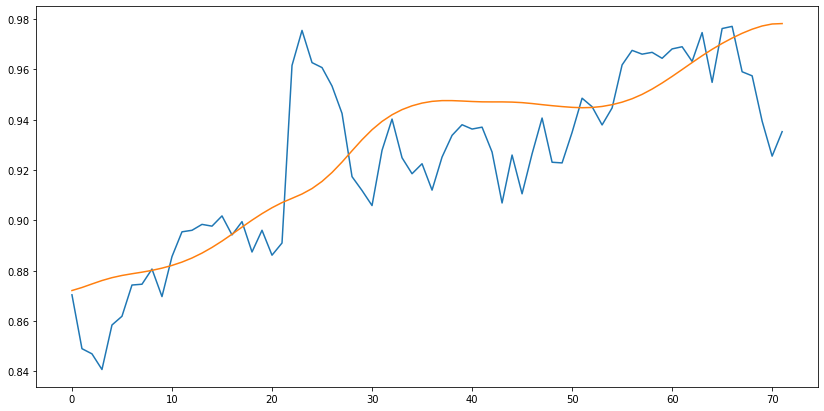

In [43]:
plt.figure(figsize=(14, 7))
plt.plot(y_test)
plt.plot(y_pred)